In [14]:
from scipy.fftpack import rfft,irfft
from scipy.io.wavfile import read as read_wav
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

In [15]:
# Load in sample audio
sr,y = read_wav('wavs/voice.wav')

In [16]:
# Play sample audio
ipd.display(ipd.Audio(data=y,rate=sr))

### Technical details

A spectrogram is just a bunch of frequency distributions placed side by side in order to show visually how the frequency distribution changes as time progresses. In order to create one, you must break up the audio at regular intervals and obtain the frequency spectrum for each of those segments. This is achieved using a (Fast) Fourier Transformation or (FFT).


#### Window Size
How many samples long should the segments be?

* Powers of 2 seem to speed this up a LOT. 

* Larger window --> higher frequency resolution but lower time evolution resolution
    
* A window length of 1 second (44100 samples) gives you a 1Hz resolution. Typical humans have about 3Hz resolution, so 0.3 seconds (14700 samples) is probably the largest window you would want. (2048 samples) gives you (~1/20 seconds) time resolution and(20 Hz) frequency resolution. Which I think is a nice middle ground.

* Alternatively, you could have high frequency and time resolution by using a large window but taking small steps along the waveform.



In [17]:
def spectrogram(y,sr): 
    
    # ---------------Segment audio for FFTs-------------
    window_length = 2048 #1024          
    num_windows = len(y)//window_length
    y = y[:num_windows*window_length]
    
    
    # --------------------Compute FFT----------------------
    y = y.reshape((num_windows,window_length))
    Y = rfft(y,axis=1).T
    
    
    # Convert to np.float32 to save memory
    return np.flip(Y.astype(np.float32),0)

def spec2wav(arr):
    arr = np.flip(arr,0).T
    Y = irfft(arr,axis=1)
    y = Y.reshape((-1))
    return y

In [18]:
spec = spectrogram(y,sr)

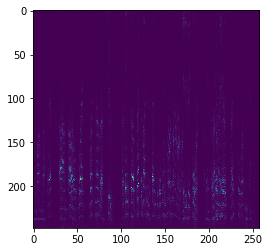

In [19]:
plt.imshow(abs(spec[1800:,:]))

### Editing the Spectrogram
We now have an image representation of the audio clip. Any changes we make to the image will affect the sound of the audio. For example, we can shift everything up to increase the pitch.

## Pitch Shift
I think this sounds a little weird because the harmonics get all messed up when you shift them linearly. A 10Hz piano key will have harmonics at 20,30,40,... If we shift it up by 1Hz we expect to hear 11,22,33,44,... , __NOT__ 11,21,31,41,...

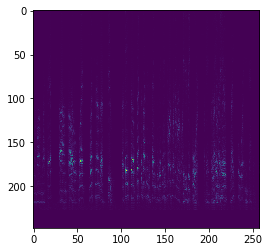

In [36]:
shift = 20
edited = np.pad(spec, pad_width = ((0,shift),(0,0)), mode='constant', constant_values=0)[shift:,:]
plt.imshow(abs(edited[1800:,:]))

In [37]:
y2 = spec2wav(edited)

In [38]:
ipd.display(ipd.Audio(data=y2,rate=sr))

## Gaussian Blur
I really like this effect. 

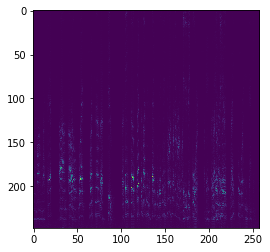

In [47]:
from scipy.ndimage import gaussian_filter
edited = gaussian_filter(spec, sigma=.3)
plt.imshow(abs(edited[1800:,:]))

In [48]:
y2 = spec2wav(edited)
ipd.display(ipd.Audio(data=y2,rate=sr))